### Data information 

The data we are using here is auto mpg data set which obtained in 1963 from the American Statistical Association.it describes various engine parameters related to fuel consumption in various car models from 1970-1982.


Importing libraries : 
NumPy, Pandas, Matplotlib, Seaborn and SciPy libraries are used to explore the dataset. 

In [130]:
#importe packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scs 
import seaborn as sns 
    


Import data: We also import a dataset for analysis with name auto-mpg.csv 

In [131]:
# import cars data
filepath = '../Uppgift/Data/auto-mpg.csv'
cars = pd.read_csv(filepath)
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [132]:
cars.shape

(398, 9)

The number of instances and attributes in dataset are 398 and 9


In [133]:
cars.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

Description of total number of columns present in dataset.  
- mpg : Miles or mileage per gallon which represents the fuel consumption of car.
- cylinders: Contains the number of cyinders present in car where fuel is combusted to generate the power.
- displacement: Overall volume of air displased by the engine (cubic inches).
- horsepower: Indicates the power of engine (horsepower).
- weight: Gross weight of car (pounds).
- acceleration: increasing speed- time to go 0-60 mph(seconds).
- model_year: year of the car model.
- origin: country of manufacture of car.
- name: Name of the car- model designation.

In [134]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [135]:
cars.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

From above dataset there are 6 NAN values are present in horsepower.

In [136]:
cars = cars.dropna() # Pick out rows that contain NaN
cars.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

## Descriptive statistics

#### Mode:
Mode is the value that appears more frequently in our dataset.We can calculate mode in Pandas through the function  <code>.mode()</code>

In [137]:
cars['origin'].mode() # calculate mode using Pandas

0    usa
Name: origin, dtype: object

In [138]:
cars['origin'].value_counts() # calculate mode using  NumPy

usa       245
japan      79
europe     68
Name: origin, dtype: int64

### Median:
Median is the middle value in a sorted list.The median can be calculated directly in Pandas with the <code>median()</code> function.
- If there is an odd amount of numbers present in dataset, then median is the middle value.
- If there is an even amount of numbers present in dataset, then median is the average of two middle values.

Let's calculate the median of the miles per gallon (mpg).


In [139]:
cars['mpg'].median() # calculate median using Pandas

22.75

In [140]:
np.median(cars['mpg']) # numpy

22.75

### Mean:
Mean is the average of a data set, i.e. the sum of all values ​​divided by how many values ​​are in the data set.

${\bar x}=\frac{1}{n}\sum_{i=1}^{n}x_i=\frac{x_1+\dots+x_n}{n}$

In [141]:
cars['mpg'].mean() # calculate mean using Pandas

23.445918367346938

In [142]:
np.mean(cars['mpg']) # calculate mean using NumPy

23.445918367346938

### Variance:
The variance is a measurement of spread between numbers in a dataset.

$\,\,\,\,\,\,\,\,\,s^2=\frac{1}{n-1}\sum_{i=1}^{n}\left(x_i-{\bar x}\right)^2$

We use $n-1$ degrees of freedom when calculating on samples, and $n$ degrees of freedom when calculating on populations. In practice, it is almost never possible to count on populations, therefore the formula $n-1$ will be by far the most common one we encounter. 


Variance can be calculated in Pandas with the <code>var()</code> function. What is the sample variance of miles per gallon (mpg) in the data set ?


In [143]:
cars['mpg'].var() # calculate variance using Pandas

60.91814186544184

In [144]:
np.var(cars['mpg'],ddof=1) # ddof in this context stands for 'delta degrees of freedom'.

60.91814186544184

### Standard deviation:
It is a measure of amount of variation or dispersion of set of data.The standard deviationvis the root of the variance : $s=\sqrt{s^2}$

Pandas also has a built-in function for standard deviation <code>std()</code> here.

In [145]:
cars['mpg'].std()# calculate standard deviation using Pandas

7.8050074865717995

In [146]:
np.std(cars['mpg'],ddof=1) # with NumPy

7.8050074865717995

In [166]:
cars_sat= cars.loc[:, 'mpg':'model_year']
cars_sat.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70


In [168]:
cars_sat.describe().apply(lambda x: '{0:.2f}.format')# Beräkna deskriptiva mått i Pandas.

mpg             {0:.2f}.format
cylinders       {0:.2f}.format
displacement    {0:.2f}.format
horsepower      {0:.2f}.format
weight          {0:.2f}.format
acceleration    {0:.2f}.format
model_year      {0:.2f}.format
dtype: object

In [148]:
cars['mpg'].mad() # Beräkna MAD med Pandas

C:\Users\vinee\AppData\Local\Temp\ipykernel_45476\1976970165.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  cars['mpg'].mad() # Beräkna MAD med Pandas


6.545710120783007

In [149]:
(cars['mpg'] - cars['mpg'].mean()).abs().mean() # 'Hårdkodad' version för MAD.

6.545710120783007

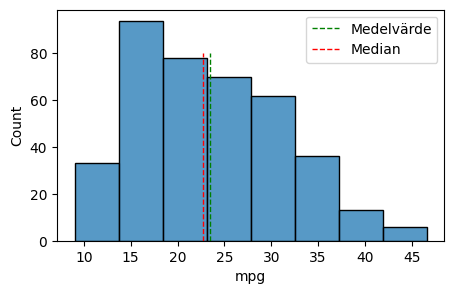

In [150]:
### Grundplot
fig, ax = plt.subplots(figsize=(5,3))
sns.histplot(cars, x='mpg', bins=8); # Plotta 'mpg' som histogram med 8 bins

### Medelvärde och median
mpg_mean = cars['mpg'].mean() # Beräkna medelvärde för 'mpg'
mpg_median = cars['mpg'].median() # Beräkna medianvärde för 'mpg'
plt.plot([mpg_mean, mpg_mean], [0, 80], color='green', linestyle='--', linewidth=1, label='Medelvärde') # Plotta medelvärde för 'body_mass_g' med streckad grön linje
plt.plot([mpg_median, mpg_median], [0, 80], color='red', linestyle='--', linewidth=1, label='Median') # Plotta medianvärde för 'body_mass_g' med streckad röd linje

### Legend
leg = plt.legend(loc='upper right') # Rita legend för medelvärde och median i övre högra hörnet
plt.show()

In [151]:
cars['mpg'].skew()# Beräkna skevhet med Pandas

0.45709232306041025